In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib as mp
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,MiniBatchKMeans,AffinityPropagation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

df = pd.read_csv(r"D:\One drive\OneDrive - Heriot-Watt University\AA Year 4\DL\DL CW\IBM.csv")
df.dataframeName = 'IBM.csv'
nRow, nCol = df.shape
print(f'{nRow} rows and {nCol} columns')

df.drop('EmployeeCount',axis =1,inplace=True)
df.drop('StandardHours',axis =1,inplace=True)
df.drop('Over18',axis =1,inplace=True)
df.drop('PerformanceRating',axis =1,inplace=True)
df.drop('EmployeeNumber',axis =1,inplace=True)
df.drop('JobRole',axis =1,inplace=True)
df.drop('MaritalStatus',axis =1,inplace=True)

df.replace({'Yes':1,'No':0,'Male':1,'Female':2,'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 3,
'Sales' : 1, 'Research & Development' : 2, 'Human Resources' : 3,'Life Sciences':1,'Medical':2,'Other':3,'Marketing':4,'Technical Degree':5}, inplace=True)
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']

1470 rows and 35 columns


K clustering 

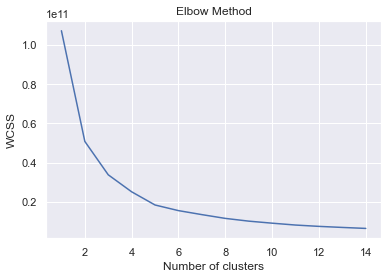

In [2]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



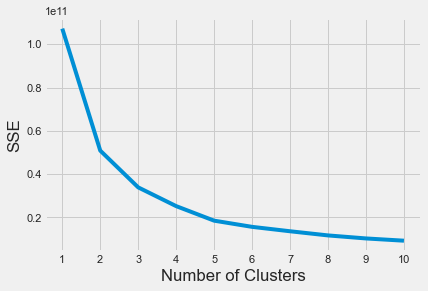

In [3]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()    

In [4]:
from kneed import KneeLocator
kl = KneeLocator(    range(1, 11), sse, curve="convex", direction="decreasing" )
kl.elbow

3

In [5]:
model = KMeans(n_clusters=2)
model.fit(X)

model.labels_

sse = model.inertia_
sse = []

temp = df.copy()
model = KMeans(n_clusters=3)
model.fit(X)
temp['Labels'] = model.labels_

# sns.pairplot(data=temp,hue='Labels')
# sns.scatterplot(data=temp, x=col1,y=col2,hue='Labels',palette='hls',alpha=0.7)
# plt.show()
# sse.append(model.inertia_)

# plt.plot(range(1,10),sse)
# plt.show()


In [6]:
temp = X.copy()
model = KMeans(n_clusters=3)
model.fit(temp)
temp['Labels'] = model.labels_

# sns.pairplot(data=temp,hue='Labels')

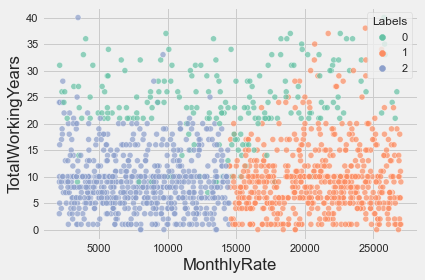

In [7]:
temp = df.copy()
model = KMeans(n_clusters=3,init="random", n_init=1,algorithm="full")
model.fit(X)
temp['Labels'] = model.labels_

# sns.pairplot(data=temp,hue='Labels')
sns.scatterplot(data=temp, y='TotalWorkingYears',x='MonthlyRate',hue='Labels',palette='Set2',alpha=0.7)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
scaled_data = df.copy()
scaled_data = sc.fit_transform(scaled_data)
pca = PCA(2)
pca_data = pca.fit_transform(df)

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


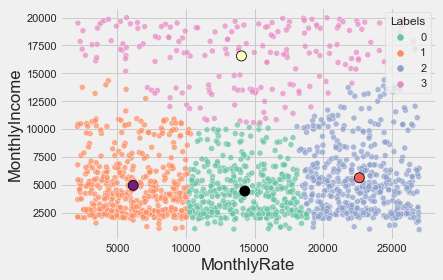

In [9]:
temp = df.copy()
model = KMeans(n_clusters=4,init="random", n_init=1,algorithm="full")
model.fit(temp)
y_pred= model.predict(temp)
y_true = model.labels_
temp['Labels'] =model.predict(temp)




ax = sns.scatterplot(data = temp,y='MonthlyIncome',x= 'MonthlyRate', hue='Labels', palette="Set2", alpha=0.7)
ax = sns.scatterplot(model.cluster_centers_[:, 15], model.cluster_centers_[:, 14],
                     hue=range(4), ec='black', legend=False, ax=ax,palette='magma',s=100)
plt.show()


In [10]:
#Fowlkes Mallows Score
def mallows(t,f):
  print('Fowlkes Mallows:', metrics.fowlkes_mallows_score(t, f))

def rand(t,f):
    print('Rand:', metrics.adjusted_rand_score(t, f))
def mutualInfo(t,f):
  print('Mutual Information: ', metrics.adjusted_mutual_info_score(t, f))
#Homogenity
def homo(t,f):
  print('Homogenity: ', metrics.homogeneity_score(t, f))
def completeness(t,f):
  print('Complete: ', metrics.completeness_score(t, f))

#CalinskiHarabasz
def calinskiHarabasz(X,labels):
  print('Harabasz:',metrics.calinski_harabasz_score(X, labels))
def silhouette(X,labels):
  print('Silhouette: ', metrics.silhouette_score(X, labels, metric='euclidean'))    

In [11]:
def kMeansClustering(data, k):

  X = data.drop('Attrition', 1)
  Y = data['Attrition']

  kmeans_model = KMeans(n_clusters=k, random_state=42).fit(X)
  predlabels = kmeans_model.labels_
  return [data, Y, predlabels]

k = kMeansClustering(df, 2)

#Accuracy of cluster
print('Two Clusters')
k = kMeansClustering(df, 2)
rand(k[1],k[2])
mallows(k[1],k[2])
mutualInfo(k[1],k[2])
homo(k[1],k[2])
completeness(k[1],k[2])
calinskiHarabasz(k[0],k[1])
silhouette(k[0],k[1])

print('\nThree Clusters')
k = kMeansClustering(df, 3)
rand(k[1],k[2])
mallows(k[1],k[2])
mutualInfo(k[1],k[2])
homo(k[1],k[2])
completeness(k[1],k[2])
calinskiHarabasz(k[0],k[1])
silhouette(k[0],k[1])

print('\nFour Clusters')
k = kMeansClustering(df, 4)
rand(k[1],k[2])
mallows(k[1],k[2])
mutualInfo(k[1],k[2])
homo(k[1],k[2])
completeness(k[1],k[2])
calinskiHarabasz(k[0],k[1])
silhouette(k[0],k[1])

print('\nFive Clusters')
k = kMeansClustering(df, 5)
rand(k[1],k[2])
mallows(k[1],k[2])
mutualInfo(k[1],k[2])
homo(k[1],k[2])
completeness(k[1],k[2])
calinskiHarabasz(k[0],k[1])
silhouette(k[0],k[1])

C:\Users\amank\AppData\Local\Temp/ipykernel_22672/3907753005.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('Attrition', 1)
C:\Users\amank\AppData\Local\Temp/ipykernel_22672/3907753005.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('Attrition', 1)


Two Clusters
Rand: -0.00020450871068522194
Fowlkes Mallows: 0.6036621645991506
Mutual Information:  -0.0005387782007861854
Homogenity:  8.009900938686736e-05
Complete:  5.1049811526875334e-05
Harabasz: 11.727141290920766
Silhouette:  -0.018216881884282502

Three Clusters
Rand: -0.016176127774119236
Fowlkes Mallows: 0.525141601562213
Mutual Information:  0.006449603947632295
Homogenity:  0.012053183211508549
Complete:  0.005330355327704761
Harabasz: 11.727141290920766
Silhouette:  -0.018216881884282502

Four Clusters


C:\Users\amank\AppData\Local\Temp/ipykernel_22672/3907753005.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('Attrition', 1)


Rand: -0.0075409861362177154
Fowlkes Mallows: 0.43899849196949287
Mutual Information:  0.007159569434759848
Homogenity:  0.016729261980776868
Complete:  0.005521541591198072
Harabasz: 11.727141290920766
Silhouette:  -0.018216881884282502

Five Clusters
Rand: -0.011132565788121135
Fowlkes Mallows: 0.4049276723904627
Mutual Information:  0.006723776446055594
Homogenity:  0.017960938006276468
Complete:  0.005240618112358709
Harabasz: 11.727141290920766


C:\Users\amank\AppData\Local\Temp/ipykernel_22672/3907753005.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('Attrition', 1)
C:\Users\amank\AppData\Local\Temp/ipykernel_22672/3907753005.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('Attrition', 1)


Silhouette:  -0.018216881884282502


Silhouette Coefficient: 0.641


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: All arrays must be of the same length

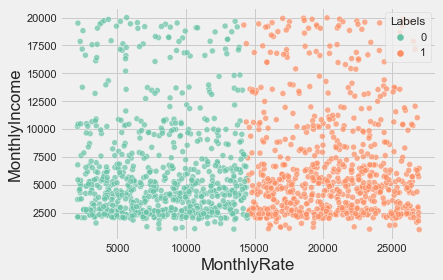

In [12]:
model = KMeans(n_clusters=2,init="random", n_init=1,algorithm="full")
model.fit(temp)
y_pred= model.predict(temp)
labels=y_true = model.labels_
labels_true = y
temp['Labels'] =model.predict(temp)


# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
# print(
#     "Adjusted Mutual Information: %0.3f"
#     % metrics.adjusted_mutual_info_score(labels_true, labels)
# )
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)
ax = sns.scatterplot(data = temp,y='MonthlyIncome',x= 'MonthlyRate', hue='Labels', palette="Set2", alpha=0.7)
ax = sns.scatterplot(model.cluster_centers_[:, 15], model.cluster_centers_[:, 14],
                     hue=range(4), ec='black', legend=False, ax=ax,palette='magma')
plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


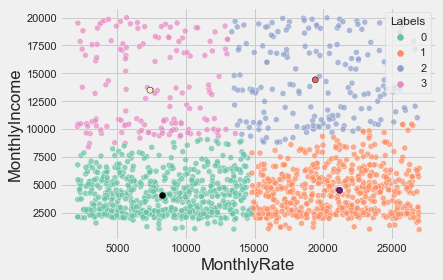

In [ ]:
model = MiniBatchKMeans(n_clusters=4,
                          random_state=0,
                          batch_size=6,
                          max_iter=10).fit(temp)

temp['Labels'] =model.predict(temp)

ax = sns.scatterplot(data = temp,y='MonthlyIncome',x= 'MonthlyRate', hue='Labels', palette="Set2", alpha=0.7)
ax = sns.scatterplot(model.cluster_centers_[:, 15], model.cluster_centers_[:, 14],
                     hue=range(4), ec='black', legend=False, ax=ax,palette='magma')
plt.show()

Estimated number of clusters: 33
Homogeneity: 0.065
Completeness: 0.008
V-measure: 0.015
Adjusted Rand Index: -0.001
Adjusted Mutual Information: 0.009
Silhouette Coefficient: 0.488


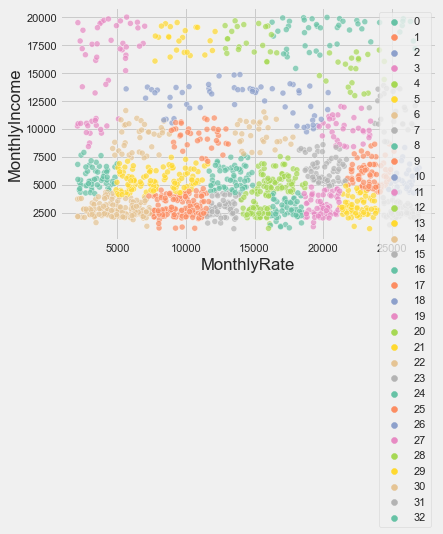

In [ ]:
af = AffinityPropagation( random_state=0).fit(df)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
labels_true = y
n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

ax = sns.scatterplot(data = temp,y='MonthlyIncome',x= 'MonthlyRate', hue=labels, palette="Set2", alpha=0.7)
# ax = sns.scatterplot(model.cluster_centers_[:, 15], model.cluster_centers_[:, 14],
#                      hue=range(4), ec='black', legend=False, ax=ax,palette='magma')
plt.show()

In [ ]:
af = AffinityPropagation(preference=-50, random_state=0).fit(df)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
labels